In [1]:
from mpcrl import MPCenv, make_config
from py_wake.examples.data.hornsrev1 import V80
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
DT_ENV = 30
DT_SIM = 10
YAW_RATE = 0.3
env = MPCenv(config=make_config(),
                turbine=V80(),  # e.g., IEA37/DTU10MW WT from PyWake
                x_pos=np.array([0, 500, 1000]),  # x positions of the turbines
                y_pos=np.array([0, 0, 0]),      # y positions of the turbines
                ws_scaling_min=6, ws_scaling_max=15,  # wind speed scaling
                wd_scaling_min=250, wd_scaling_max=290,  # wind direction scaling
                ti_scaling_min=0.0, ti_scaling_max=0.15,  # turbulence intensity scaling
                turbtype="None",
                dt_env=DT_ENV,
                dt_sim=DT_SIM,
                yaw_step_sim=DT_SIM*YAW_RATE,  # 10 sim step * 0.3 (yaw actuation time)
                yaw_init='Zeros',

                )

In [ ]:
obs, info = env.reset()


powers_plot = []
yaws_plot = []
time_plot = []
time_plot_coarse = []
wd_belief_plot = []
ws_belief_plot = []
TI_belief_plot = []

for _ in range(30):
    action = env.action_space.sample()
    print("yaws:", env.fs.windTurbines.yaw)
    obs, reward, terminated, truncated,  info = env.step(env.action_space.sample())

    powers_plot.append(info["powers"].sum(axis=1))
    time_plot.append(info["time_array"])
    yaws_plot.append(info["yaws"])
    
    wd_belief_plot.append(info["estimated_wd"])
    ws_belief_plot.append(info["estimated_ws"])
    TI_belief_plot.append(info["estimated_TI"])

    time_plot_coarse.append(copy.copy(env.fs.time))


yaws: [0. 0. 0.]
yaws: [1.60379342 0.         0.        ]
yaws: [-0.14282197  0.          0.        ]
yaws: [-0.14282197  0.          0.        ]
yaws: [-0.14282197  0.          0.        ]
yaws: [-0.14282197  0.          0.        ]
yaws: [-0.14282197  0.          0.        ]
yaws: [-0.14282197  0.          0.        ]
yaws: [-7.27386175 -5.10981996  0.        ]
yaws: [-1.052124    0.59922782  0.        ]
yaws: [ 0.55166942 -0.31317933  0.        ]
yaws: [ 5.52280816 -0.31317933  0.        ]
yaws: [ 1.25841772 -0.31317933  0.        ]
yaws: [ 0.01502251 -0.31317933  0.        ]
yaws: [ 1.61881593 -0.31317933  0.        ]
yaws: [-2.60504352 -0.31317933  0.        ]
yaws: [-10.57598912  -8.31230289   0.        ]
yaws: [-18.10358199  -0.86331186   0.        ]
yaws: [-9.44207481  5.90385663  0.        ]
yaws: [-16.96966768  -2.32696353   0.        ]
yaws: [-9.05199842 -3.23937069  0.        ]
yaws: [-2.83026067 -3.23937069  0.        ]
yaws: [-2.83026067 -3.23937069  0.        ]
yaws: [1.

In [4]:
time_plot = np.concatenate(time_plot)
powers_plot = np.concatenate(powers_plot)
yaws_plot = np.concatenate(yaws_plot)

wd_belief_plot = np.array(wd_belief_plot).squeeze()
ws_belief_plot = np.array(ws_belief_plot).squeeze()
TI_belief_plot = np.array(TI_belief_plot).squeeze()
time_plot_coarse = np.array(time_plot_coarse)

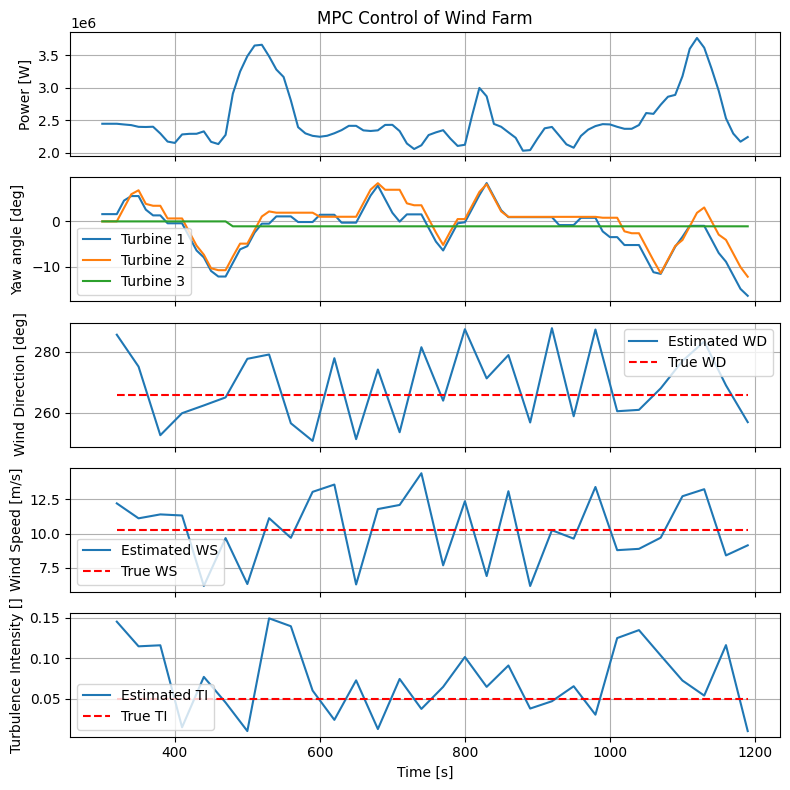

In [5]:
fig, ax = plt.subplots(5,1, figsize=(8,8), sharex=True)

ax[0].plot(time_plot, powers_plot)
ax[0].set_ylabel("Power [W]")
ax[0].set_title("MPC Control of Wind Farm")
ax[0].grid()

ax[1].plot(time_plot, yaws_plot)
ax[1].set_ylabel("Yaw angle [deg]")

ax[1].legend([f"Turbine {i+1}" for i in range(yaws_plot.shape[1])])
ax[1].grid()


ax[2].plot(time_plot_coarse, wd_belief_plot, label='Estimated WD')
ax[2].set_ylabel("Wind Direction [deg]")
ax[2].hlines(env.wd, time_plot_coarse[0], time_plot_coarse[-1], colors='r', linestyles='dashed', label='True WD')
ax[2].grid()
ax[2].legend()

ax[3].plot(time_plot_coarse, ws_belief_plot, label='Estimated WS')
ax[3].set_ylabel("Wind Speed [m/s]")
ax[3].hlines(env.ws, time_plot_coarse[0], time_plot_coarse[-1], colors='r', linestyles='dashed', label='True WS')
ax[3].grid()
ax[3].legend()

ax[4].plot(time_plot_coarse, TI_belief_plot, label='Estimated TI')
ax[4].set_ylabel("Turbulence Intensity []")
ax[4].hlines(env.ti, time_plot_coarse[0], time_plot_coarse[-1], colors='r', linestyles='dashed', label='True TI')
ax[4].grid()
ax[4].legend()

ax[-1].set_xlabel("Time [s]")
plt.tight_layout()
plt.show()


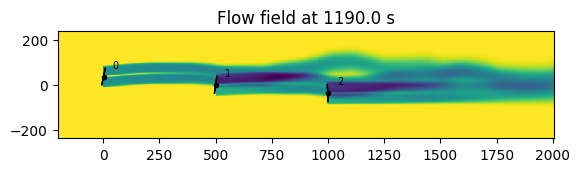

In [6]:
env.plot_farm()

In [7]:
DT_ENV = 30
DT_SIM = 10
YAW_RATE = 0.3
env = MPCenv(config=make_config(),
                turbine=V80(),  # e.g., IEA37/DTU10MW WT from PyWake
                x_pos=np.array([0, 500, 1000]),  # x positions of the turbines
                y_pos=np.array([0, 0, 0]),      # y positions of the turbines
                ws_scaling_min=6, ws_scaling_max=15,  # wind speed scaling
                wd_scaling_min=250, wd_scaling_max=290,  # wind direction scaling
                ti_scaling_min=0.00, ti_scaling_max=0.15,  # turbulence intensity scaling
                turbtype="None",
                dt_env=DT_ENV,
                dt_sim=DT_SIM,
                yaw_step_sim=DT_SIM*YAW_RATE,  # 10 sim step * 0.3 (yaw actuation time)
                yaw_init='Zeros',
                )

In [8]:
obs, info = env.reset()
print("Environment reset successful!")
print(f"Initial observation shape: {obs.shape}")
print(f"True conditions - WD: {env.wd:.2f}, WS: {env.ws:.2f}, TI: {env.ti:.5f}")

Environment reset successful!
Initial observation shape: (27,)
True conditions - WD: 268.25, WS: 10.19, TI: 0.05000


In [9]:
# Test with a random action (this could produce very low TI values)
action = env.action_space.sample()
print(f"Random action sampled: {action}")
print(f"Testing step function...")

obs, reward, terminated, truncated, info = env.step(action)

print(f"\nStep successful!")
print(f"Reward: {reward:.2f}")
print(f"Power sum: {info['powers'].sum():.2f} W")

Random action sampled: [ 0.7821974  -0.5809619   0.98876286]
Testing step function...
Estimated conditions - WD: 285.64395, WS: 7.88567, TI: 0.14916

Step successful!
Reward: 0.41
Power sum: 5195710.50 W


In [10]:
# Reset environment and test again
obs, info = env.reset()
print("Environment reset successful!")

# Test with a random action that might produce low TI
action = env.action_space.sample()
print(f"\nRandom action: {action}")

obs, reward, terminated, truncated, info = env.step(action)

print(f"\nStep successful!")
print(f"Reward: {reward:.2f}")
print(f"Power sum: {info['powers'].sum():.2f} W")

Environment reset successful!

Random action: [-0.90094984 -0.87396973  0.9960131 ]
Estimated conditions - WD: 251.98100, WS: 6.56714, TI: 0.14970

Step successful!
Reward: 0.38
Power sum: 5436062.50 W


In [11]:
# Test with multiple steps including edge cases
print("Testing multiple steps with various random actions...\n")

for i in range(5):
    action = env.action_space.sample()
    # Reconstruct what TI will be
    estimated_TI = (action[2] + 1) / 2 * (0.15 - 0.00) + 0.00
    print(f"Step {i+1}: Action TI component = {action[2]:.3f} -> Estimated TI = {estimated_TI:.5f}")
    
    obs, reward, terminated, truncated, info = env.step(action)
    print(f"  ✓ Success! Reward: {reward:.2f}, Power: {info['powers'].sum()/1e6:.2f} MW\n")

print("All steps completed successfully!")

Testing multiple steps with various random actions...

Step 1: Action TI component = 0.663 -> Estimated TI = 0.12471
Estimated conditions - WD: 270.36786, WS: 10.65582, TI: 0.12471
  ✓ Success! Reward: 0.38, Power: 5.33 MW

Step 2: Action TI component = 0.218 -> Estimated TI = 0.09135
Estimated conditions - WD: 287.57703, WS: 9.19588, TI: 0.09135
  ✓ Success! Reward: 0.38, Power: 5.41 MW

Step 3: Action TI component = 0.508 -> Estimated TI = 0.11309
Estimated conditions - WD: 252.43773, WS: 6.87679, TI: 0.11309
  ✓ Success! Reward: 0.41, Power: 5.83 MW

Step 4: Action TI component = -0.703 -> Estimated TI = 0.02231
Estimated conditions - WD: 252.91125, WS: 14.44396, TI: 0.02231
  ✓ Success! Reward: 0.39, Power: 5.45 MW

Step 5: Action TI component = -0.673 -> Estimated TI = 0.02450
Estimated conditions - WD: 280.40381, WS: 13.16850, TI: 0.02450
  ✓ Success! Reward: 0.40, Power: 5.66 MW

All steps completed successfully!


In [12]:
# Test with extreme edge case: TI action = -1.0 (which would give TI = 0.0 without clamping)
print("Testing extreme edge case: TI action = -1.0\n")

extreme_action = np.array([0.0, 0.0, -1.0])  # TI action = -1.0
estimated_TI_unclamped = (extreme_action[2] + 1) / 2 * (0.15 - 0.00) + 0.00
print(f"Action TI component: {extreme_action[2]}")
print(f"Would be TI (without clamping): {estimated_TI_unclamped:.5f}")
print(f"Expected TI (with MIN_TI=0.01 clamping): 0.01000\n")

obs, reward, terminated, truncated, info = env.step(extreme_action)

print(f"✓ Success! No crash!")
print(f"Actual estimated TI from info: {info['estimated_TI']:.5f}")
print(f"Reward: {reward:.2f}")
print(f"Power: {info['powers'].sum()/1e6:.2f} MW")

Testing extreme edge case: TI action = -1.0

Action TI component: -1.0
Would be TI (without clamping): 0.00000
Expected TI (with MIN_TI=0.01 clamping): 0.01000

Estimated conditions - WD: 270.00000, WS: 10.50000, TI: 0.01000
✓ Success! No crash!
Actual estimated TI from info: 0.01000
Reward: 0.38
Power: 5.38 MW


In [13]:
# Reset and test with the extreme edge case again
obs, info = env.reset()
print("Environment reset\n")

# Test with extreme edge case: TI action = -1.0
extreme_action = np.array([0.0, 0.0, -1.0])
print(f"Testing extreme case: TI action = -1.0")
print(f"(Should be clamped to TI = 0.01)\n")

obs, reward, terminated, truncated, info = env.step(extreme_action)

print(f"\n✓ Success! No crash!")
print(f"Estimated TI from info: {info['estimated_TI']:.5f}")
print(f"Reward: {reward:.2f}")
print(f"Power: {info['powers'].sum()/1e6:.2f} MW")

Environment reset

Testing extreme case: TI action = -1.0
(Should be clamped to TI = 0.01)

Estimated conditions - WD: 270.00000, WS: 10.50000, TI: 0.01000

✓ Success! No crash!
Estimated TI from info: 0.01000
Reward: 0.58
Power: 9.63 MW
